In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Eigendecomposition
Eigendecomposition can be seen in different ways depending on its use.Eigendecomposition has a geometric interpretation(axes of rotational invariance), a statistical interpetation (directions of maximal covariance),  a  dynamical-systems  interpretation  (stable  system  states),  a  graph-theoretic interpretation  (the  impact  of  a  node  on  its  network),  a  financial-market  interpretation (identifying stocks that covary), and many more..
Eigendecomposition is among the most important contributions of linear algebra to data science. The purpose of this chapter is to provide you an intuitive understanding of eigenvalues and eigenvectors—the results of eigendecomposition  of  a  matrix.  Along  the  way,  you’ll  learn  about  diagonalization  and  more  special properties of symmetric matrices.

### Eigendecomposition is defined only for square matrices. It is not possible to eigendecompose  an  M×N  matrix  unless  M=N.  Nonsquare  matrices  can  be  decomposed using the SVD. Every square matrix of size M×M has M eigenvalues (scalars) and M corresponding eigenvectors. The purpose of eigendecomposition is to reveal those M vector-scalar pairs.

# Interpretations of Eigenvalues and Eigenvectors

### 1. Geometry
The  geometric  concept  of  eigenvectors  was introduced in Chapter  5. we  discovered  that  there  was  a  special  combination  of  a matrix  and  a  vector  such  that  the  matrix  stretched but  did  not  rotate that  vector. <b>That  vector  is  an  eigenvector  of  the  matrix,  and  the  amount  of  stretching  is  the eigenvalue</b><br>
The below figure shows  vectors  before  and  after  multiplication  by  a  2 × 2  matrix.  The two  vectors  in  the  left  plot  (v1 and v2)  are  eigenvectors  whereas  the  two  vectors  in the  right  plot  are  not.  The  eigenvectors  point  in  the  same  direction  before  and  after post multiplying  the  matrix.  The  eigenvalues  encode  the  amount  of  stretching; 

[-0.61803399  1.61803399]


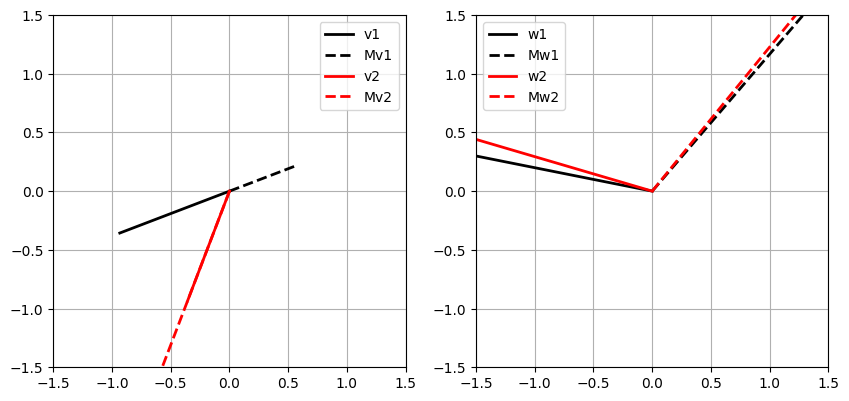

In [2]:
# in 2D of course, for visualization

# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)
print(eigenvalues)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors



## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[1,0]],'k',linewidth=2,label='v1')
axs[0].plot([0,Mv[0,0]],[0,Mv[1,0]],'k--',linewidth=2,label='Mv1')

axs[0].plot([0,eigenvectors[0,1]],[0,eigenvectors[1,1]],'r',linewidth=2,label='v2')
axs[0].plot([0,Mv[0,1]],[0,Mv[1,1]],'r--',linewidth=2,label='Mv2')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[1,0]],'k',linewidth=2,label='w1')
axs[1].plot([0,Mw[0,0]],[0,Mw[1,0]],'k--',linewidth=2,label='Mw1')

axs[1].plot([0,notEigenvectors[0,1]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='w2')
axs[1].plot([0,Mw[0,1]],[0,Mw[1,1]],'r--',linewidth=2,label='Mw2')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()


### That’s the geometric picture: an eigenvector means that matrix-vector multiplication acts  like  scalar-vector  multiplication.
<a id="eq_13.1"></a>
### Eigenvalue equation 13.1 <br> $$ Av = \lambda\ v $$
Be  careful  with  interpreting  that  equation:  <b>it  does  not  say  that  the  matrix  equals  the scalar; it says that the effect of the matrix on the vector is the same as the effect of the scalar on that same vector.</b><br>
This  is  called  the  eigenvalue  equation,  and  it’s  another  key  formula  in  linear  algebra that is worth memorizing. 

### 2. Noise Reduction
Noise  refers  to  variance  in  a  dataset  that  is  either  unexplained  (e.g.,  random  variation)  or  unwanted  (e.g.,  electrical  line  noise  artifacts  in radio signals). There are many ways to attenuate or eliminate noise, and the optimal noise-reduction  strategy  depends  on  the  nature  and  origin  of  the  noise  and  on  the characteristics of the signal.<br>
One method of reducing random noise is to identify the eigenvalues and eigenvectors of a system, and “project out” directions in the data space associated with small eigenvalues. The assumption is that random noise makes a relatively small contribution to the  total  variance.  “Projecting  out”  a  data  dimension  means  to  reconstruct  a  dataset after setting some eigenvalues that are below some threshold to zero.

### 3. Dimension Reduction (Data Compression)
Transmitting  data  canbe  time-consuming  and  expensive,  and  it  is  beneficial  to  compress  the  data  before transmitting it. Compression means to reduce the size of the data (in terms of bytes) while having minimal impact on the quality of the data. <br>
One  way  to  dimension-reduce  a  dataset  is  to  take  its  eigendecomposition,  drop the  eigenvalues  and  eigenvectors  associated  with  small  directions  in  the  data  space, and  then  transmit  only  the  relatively  larger  eigenvector/value  pairs.  It  is  actually more  common  to  use  the  SVD  for  data  compression, although the principle is the same.<br>
Modern  data  compression  algorithms  are  actually  faster  and  more  efficient  than  the method  previously  described,  but  the  idea  is  the  same:  decompose  the  dataset  into a  set  of  basis  vectors  that  capture  the  most  important  features  of  the  data,  and  then reconstruct a high-quality version of the original data.

## Finding Eigenvalues
To eigendecompose a square matrix, you first find the eigenvalues and then use each eigenvalue  to  find  its  corresponding  eigenvector. The  eigenvalues  are  like  keys  that you insert into the matrix to unlock the mystical eigenvector.

In [3]:
#Finding the eigenvalues of a matrix is super easy in Python:
matrix = np.array([[1,2],[3,4]])
# get the eigenvalues
evals = np.linalg.eig(matrix)[0]
print(evals)

[-0.37228132  5.37228132]


But  the  important  question  <b>isn’t  which  function  returns  the  eigenvalues;  instead,  the important question is how are the eigenvalues of a matrix identified?</b><br>
To  find  the  eigenvalues  of  a  matrix,  we  start  with  the  eigenvalue  equation  shown  in [Equation 13-1](#eq_13.1) and do some simple arithmetic, as shown in Equation 13-2. <br>
<a id = "eq_13.2"></a>
$$
Av = \lambda\ v
$$
$$
Av - \lambda\ v = 0
$$
$$
(A - \lambda\ I)v = 0
$$
<br>The  first  equation  is  an  exact  repeat  of  the  eigenvalue  equation.  In  the  second equation,  we  simply  subtracted  the  right-hand  side  to  set  the  equation  to  the  zeros vector.<br>
The transition from the second to the third equation requires some explanation. The left-hand side of the second equation has two vector terms, both of which involve v. So we factor out the vector. But that leaves us with the subtraction of a matrix and a scalar (A−λ), which is not a defined operation in linear algebra. So instead, we shift the matrix by λ. That brings us to the third equation. (Side note: the expression λI is sometimes called a scalar matrix.)
### What does that third equation mean? It means that the eigenvector is in the null space of the matrix shifted by its eigenvalue.<br>
If  it  helps  you  understand  the  concept  of  the  eigenvector  as  the  null-space  vector  of the shifted matrix, you can think of adding two additional equations:<br>
$$\tilde{A} = A - \lambda I$$
$$\tilde{A} v = 0$$
#### Why  is  that  statement  so  insightful?  Remember  that  we  ignore  trivial  solutions  in linear algebra, so we do not consider v=0 to be an eigenvector. And that means that the matrix shifted by its eigenvalue is singular because only singular matrices have a nontrivial null space.<br>
#### And what else do we know about singular matrices? We know that their determinant is zero. Hence:-
$$ |A - \lambda\ I| = 0$$

Believe  it  or  not,  that’s  the  key  to  finding  eigenvalues:  shift  the  matrix  by  the unknown  eigenvalue  λ,  set  its  determinant  to  zero,  and  solve  for  λ.  Let’s  see  how this looks for a 2 × 2 :-
$$
| \begin{bmatrix} a & b \\ c & d \end{bmatrix} - \lambda\ \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} | = 
$$
$$
| \begin{bmatrix} a - \lambda\ & b\\ c & d - \lambda\ \end{bmatrix} | = 0
$$
$$
(a - \lambda)(d - \lambda) - bc = 0
$$
$$
\lambda^2 - (a+d)\lambda + (ad - bc) = 0
$$
<br>You  could  apply  the  quadratic  formula  to  solve  for  the  two  λ  values.  But  the  answer itself  isn’t  important;  the  important  thing  is  to  see  the  logical  progression  of  mathematical concepts established earlier:
1. The matrix-vector multiplication acts like scalar-vector multiplication (the eigenvalue equation).
2. We set the eigenvalue equation to the zeros vector, and factor out common terms.
3. This  reveals  that  the  eigenvector  is  in  the  null  space  of  the  matrix  shifted  by the  eigenvalue.  We  do  not  consider  the  zeros  vector  to  be  an  eigenvector,  which means the shifted matrix is singular.
4. Therefore, we set the determinant of the shifted matrix to zero and solve for the unknown eigenvalue.

<br>The determinant of an eigenvalue-shifted matrix set to zero is called the characteristic polynomial of the matrix.

### Finding Eigenvectors
The eigenvectors are in the columns of the matrix evecs and are in the same order as the eigenvalues (that is, the eigenvector in the first column of matrix evecs is paired with the first eigenvalue in vector evals).<br>
The  most  important  thing  to  keep  in  mind  about  eigenvectors when  coding  is  that  they  are  stored  in  the  columns  of  the  matrix,not  the  rows!  Such  dimensional-indexing  errors  are  easy  to  make with  square  matrices, but accidentally using the rows instead of the columns of the eigen‐vectors  matrix  can  have  disastrous  consequences  in  applications.When  in  doubt,  remember  the  discussion  from  Chapter  2  that common convention in linear algebra is to assume that vectors are in column orientation.<br>


In [4]:
evals,evecs = np.linalg.eig(matrix)
print(evals)
print(evecs)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


The  above  code  shows  how  to  get  a  NumPy  function  to  return the  eigenvectors  of  a  matrix. The important question is Where do eigenvectors come from, and how do we find them?<br>
Find the vector v that is in the null space of the matrix shifted by λ. In other words: <br>
$$ v_i ∈ N(A - \lambda_i I)$$
<br>Let’s see a numerical example. Following is a matrix and its eigenvalues:<br>
$$ \begin{bmatrix} 1 & 2\\ 2 & 1\end{bmatrix} => \lambda_1 = 3, \lambda_2 = -1$$
<br> Let’s  focus  on  the  first  eigenvalue.  To  reveal  its  eigenvector,  we  shift  the  matrix  by  3 and find a vector in its null space:
$$ \begin{bmatrix}1-3 & 2\\2 & 1-3\end{bmatrix} = \begin{bmatrix}-2 & 2\\2 & -2\end{bmatrix} => \begin{bmatrix}-2 & 2\\2 & -2\end{bmatrix}\begin{bmatrix}1\\1\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$$<br>
This means that [1 1] is an eigenvector of the matrix associated with an eigenvalue of 3.<br> I  found  that  null  space  vector  just  by  looking  at  the  matrix.  How  are  the  null  space vectors (that is, the eigenvectors of the matrix) actually identified in practice?<br>Null space vectors can be found by using Gauss-Jordan to solve a system of equations, where  the  coefficients  matrix  is  the  λ-shifted  matrix  and  the  constants  vector  is  the zeros  vector.  That’s  a  good  way  to  conceptualize  the  solution.  In  implementation, more stable numerical methods are applied for finding eigenvalues and eigenvectors, including QR decomposition and a procedure called the power method.

### Sign and Scale Indeterminacy of Eigenvectors
Let me return to the numerical example in the previous section. I wrote that [1 1] wasan  eigenvector  of  the  matrix  because  that  vector  is  a  basis  for  the  null  space  of  the matrix shifted by its eigenvalue of 3.<br>
Look back at the shifted matrix and ask yourself, is [1 1] the only possible basis vector for  the  null  space?  Not  even  close!  You  could  also  use  [4  4]  or  [−5.4  −5.4]  or...I think you see where this is going: any scaled version of vector [1 1] is a basis for that null  space.  In  other  words,  if  v  is  an  eigenvector  of  a  matrix,  then  so  is  αv  for  any real-valued α except zero.<br>
Indeed,  eigenvectors  are  important  because  of  their  direction,  not  because  of  their magnitude.<br>
The infinity of possible null space basis vectors leads to two questions:
1. Is  there  one  “best”  basis  vector?  There  isn’t  a  “best”  basis  vector  per  se,  but  it is  convenient  to  have  eigenvectors  that  are  unit  normalized  (a  Euclidean  normof  1).  This  is  particularly  useful  for  symmetric  matrices  for  reasons  that  will  beexplained later in this chapter.
2. What  is  the  “correct”  sign  of  an  eigenvector?  There  is  none.  In  fact,  you  can  get different eigenvector signs from the same matrix when using different versions of NumPy as  well  as  different  software  such  as  MATLAB,  Julia,  or  Mathematica.Eigenvector sign indeterminacy is just a feature of life in our universe. In applications  such  as  PCA,  there  are  principled  ways  for  assigning  a  sign,  but  that’s  just common convention to facilitate interpretation.

## Diagonalizing a Square Matrix
The eigenvalue equation that you are now familiar with lists one eigenvalue and one eigenvector. This means that an M×M matrix has M eigenvalue equations:<br>
$$
Av_1 = \lambda_1 v_1
$$
$$
.
$$
$$
.
$$
$$
.
$$
$$
Av_M = \lambda_M v_M
$$
There’s  nothing  really  wrong  with  that  series  of  equations,  but  it  is  kind  of  ugly,  and ugliness violates one of the principles of linear algebra: make equations compact and elegant. Therefore, we transform this series of equations into one matrix equation.<br>
The  key  insight  for  writing  out  the  matrix  eigenvalue  equation  is  that  each  column of the eigenvectors matrix is scaled by exactly one eigenvalue. We can implement this through postmultiplication by a diagonal matrix.<br>
So  instead  of  storing  the  eigenvalues  in  a  vector,  we  store  the  eigenvalues  in  the diagonal of a matrix. The following equation shows the form of diagonalization for a 3 × 3 matrix (using @ in place of numerical values in the matrix). In the eigenvectors matrix,  the  first  subscript  number  corresponds  to  the  eigenvector,  and  the  second subscript  number  corresponds  to  the  eigenvector  element.  For  example,  $v_{12}$  is  thesecond element of the first eigenvector:
$$
\begin{bmatrix}@ & @ & @\\@ & @ & @\\@ & @ & @\end{bmatrix}\begin{bmatrix}v_{11} & v_{21} & v_{31}\\v_{12} & v_{22} & v_{32}\\v_{13} & v_{23} & v_{33}\end{bmatrix} = \begin{bmatrix}v_{11} & v_{21} & v_{31}\\v_{12} & v_{22} & v_{32}\\v_{13} & v_{23} & v_{33}\end{bmatrix}\begin{bmatrix}\lambda_1 & 0 & 0\\0 & \lambda_2 & 0\\0 & 0 &\lambda_3\end{bmatrix} = \begin{bmatrix}\lambda_1 v_{11} & \lambda_2 v_{21} & \lambda_3 v_{31}\\\lambda_1 v_{12} & \lambda_2 v_{22} & \lambda_3 v_{32}\\\lambda_1 v_{13} & \lambda_2 v_{23} & \lambda_3 v_{33}\end{bmatrix}
$$
<br>
Please  take  a  moment  to  confirm  that  each  eigenvalue  scales  all  elements  of  its corresponding eigenvector, and not any other eigenvectors.<br>
More generally, the matrix eigenvalue equation—a.k.a. the diagonalization of a square matrix—is:
$$ AV = V\lambda$$
NumPy’s  eig  function  returns  eigenvectors  in  a  matrix  and  eigenvalues  in  a  vector.This means that diagonalizing a matrix in NumPy requires a bit of extra code:<br>
evals,evecs = np.linalg.eig(matrix)<br>
D = np.diag(evals)<br>
By the way, it’s often interesting and insightful in mathematics to rearrange equations by  solving  for  different  variables.  Consider  the  following  list  of  equivalent  declarations:
$$
AV = V \lambda
$$
$$
A = V \lambda V^{-1}
$$
$$
\lambda = V^{-1}A V
$$
<br>
The  second  equation  shows  that  matrix  A  becomes  diagonal  inside  the  space  of  V(that  is,  V  moves  us  into  the  “diagonal  space,”  and  then  $V^{−1}$  gets  us  back  out  of  the diagonal space). This can be interpreted in the context of basis vectors: the matrix A is dense in the standard basis, but then we apply a set of transformations (V) to rotate the matrix into a new set of basis vectors (the eigenvectors) in which the information is sparse and represented by a diagonal matrix. (At the end of the equation, we need to get back into the standard basis space, hence the $V^{−1}$.)

## The Special Awesomeness of Symmetric Matrices
You already know from earlier chapters that symmetric matrices have special properties that make them great to work with. Now you are ready to learn two more special properties that relate to eigendecomposition.
### 1. Orthogonal Eigenvectors
Symmetric matrices have orthogonal eigenvectors. That means that all eigenvectors of a symmetric matrix are pair-wise orthogonal.

In [5]:
A = np.random.randint(-3,4,(3,3))
A = A.T@A
# its eigendecomposition
L,V = np.linalg.eig(A)
# all pairwise dot products
print( np.dot(V[:,0],V[:,1]) )
print( np.dot(V[:,0],V[:,2]) )
print( np.dot(V[:,1],V[:,2]) )

-7.8236028766554e-16
2.7755575615628914e-17
-6.245004513516506e-17


The  three  dot  products  are  all  zero  (within  computer  rounding  errors  on  the  order of  $10^{−16}$.  (Notice  that  I’ve  created  symmetric  matrices  as  a  random  matrix  times  its transpose.)<br>
The  orthogonal  eigenvector  property  means  that  the  dot  product  between  any  pair of eigenvectors is zero, while the dot product of an eigenvector with itself is nonzero(because  we  do  not  consider  the  zeros  vector  to  be  an  eigenvector).  This  can  be written as $V^TV=D$, where D is a diagonal matrix with the diagonals containing the norms of the eigenvectors.<br>
But  we  can  do  even  better  than  just  a  diagonal  matrix:  recall  that  eigenvectors  are important because of their direction, not because of their magnitude. So an eigenvector can have any magnitude we want (except, obviously, for a magnitude of zero).<br>
Let’s  scale  all  eigenvectors  so  they  have  unit  length.  Question  for  you:  if  all  eigenvectors  are  orthogonal  and  have  unit  length,  what  happens  when  we  multiply  the eigenvectors matrix by its transpose? Of course you know the answer:
$$ V^TV = I$$
<br>
In  other  words,  the  eigenvectors  matrix  of  a  symmetric  matrix  is  an  orthogonal matrix!  This  has  multiple  implications  for  data  science,  including  that  the  eigenvectors  are  super  easy  to  invert  (because  you  simply  transpose  them).  There  are  other implications  of  orthogonal  eigenvectors  for  applications  such  as  principal  components analysis.<br>
Orthogonal eigenvectors of symmetric matrices is such an important concept that you really need to see this claim proven.<br>
The goal of this proof is to show that the dot product between any pair of eigenvectors  is  zero.  We  start  from  two  assumptions:  (1)  matrix  A  is  symmetric,  and  (2)  $λ_1$ and $λ_2$ are distinct eigenvalues of A (distinct meaning they cannot equal each other), with  $v_1$  and  $v_2$  as  their  corresponding  eigenvectors.  Try  to  follow  each  equality  step from left to right of <a id = "Equation 13-3">Equation 13-3</a><br>
<i>Equation 13-3. Proof of eigenvector orthogonality for symmetric matrices</i>
$$ \lambda_1 v_1^T v_2 = (Av_1)^Tv_2 = v_1^TA^Tv_2 = v_1^T \lambda_2 v_2 = \lambda_2 v_1^T v_2$$<br>
The  terms  in  the  middle  are  just  transformations;  pay  attention  to  the  first  and  last terms. They are rewritten in <a id="Equation 13-4"> Equation 13-4</a>, and then subtracted to set to zero.<br>
<i>Equation 13-4. Continuing the eigenvector orthogonality proof...</i>
$$ \lambda_1 v_1^T v_2 = \lambda_2 v_1^T v_2$$
$$ \lambda_1 v_1^T v_2 - \lambda_2 v_1^T v_2 = 0$$<br>
Both terms contain the dot product v1Tv2, which can be factored out. This brings us to the final part of the proof, which is shown in <a id="Equation 13-5">Equation 13-5.</a><br>
<i>Equation 13-5. Eigenvector orthogonality proof, part 3</i>
$$ (\lambda_1 - \lambda_2) v_1^T v_2 = 0$$<br>
This final equation says that two quantities multiply to produce 0, which means that one  or  both  of  those  quantities  must  be  zero.  $λ_1−λ_2$  cannot  equal  zero  because we  began  from  the  assumption  that  they  are  distinct.  Therefore,  $v_1^Tv_2$  must  equal zero,  which  means  that  the  two  eigenvectors  are  orthogonal.  Go  back  through  the equations to convince yourself that this proof fails for nonsymmetric matrices, when $A^T≠A$.  Thus,  the  eigenvectors  of  a  nonsymmetric  matrix  are  not  constrained  to  be orthogonal  (they  will  be  linearly  independent  for  all  distinct  eigenvalues,  but  I  will omit that discussion and proof ).

### 2. Real-Valued Eigenvalues
A second special property of symmetric matrices is that they have real valued eigenvalues (and therefore real valued eigenvectors).
Let  me  start  by  showing  that  matrices even  with  all  real-valued  entries can  have complex-valued eigenvalues:

In [6]:
A = np.array([[-3, -3, 0],[ 3, -2, 3],[ 0,  1, 2]])
# its eigendecomposition
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-2.744739  +2.85172624j],
       [-2.744739  -2.85172624j],
       [ 2.48947801+0.j        ]])

Be  careful  with  interpreting  that  NumPy  array;  it  is  not  a  3 × 2 matrix;  it  is  a  3 × 1 column  vector  that  contains  complex  numbers.  Note  the  j  and  the  absence  of  acomma between numbers.<br>
The 3 × 3 matrix A has two complex eigenvalues and one real-valued eigenvalue. The eigenvectors coupled to the complex-valued eigenvalues will themselves be complex-valued.  There  is  nothing  special  about  that  particular  matrix;  I  literally  generated  it from  random  integers  between  −3  and  +3.  Interestingly,  complex-valued  solutions come in conjugate pairs. That means that if there is a $λ_j = a + ib$, then there is a $λ_k = a− ib$. Their corresponding eigenvectors are also complex conjugate pairs.<br>
Symmetric  matrices  are  guaranteed  to  have  real-valued  eigenvalues,  and  thereforealso  real-valued  eigenvectors.  Let  me  start  by  modifying  the  previous  example  to make the matrix symmetric:

In [7]:
A = np.array([[-3, -3, 0],[-3, -2, 1],[ 0,  1, 2]])
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-5.59707146],
       [ 0.22606174],
       [ 2.37100972]])

Guaranteed  real-valued  eigenvalues  from  symmetric  matrices  is  fortunate  because complex  numbers  are  often  confusing  to  work  with.  Lots  of  matrices  used  in  datascience  are  symmetric,  and  so  if  you  see  complex  eigenvalues  in  your  data  science applications, it’s possible that there is a problem with the code or with the data.<br>
<b>If  you  know  that  you  are  working  with  a  symmetric  matrix,  you can use <i>np.linalg.eigh</i> instead of <i>np.linalg.eig</i> (or <i>SciPy’s eigh instead  of  eig</i>).  The  h  is  for  “Hermitian,”  which  is  the  complex version of a symmetric matrix. eigh can be faster and more numerically stable than eig, but works only on symmetric matrices.</b>

## Eigendecomposition of Singular Matrices
I  included  this  section  here  because  I  find  that  students  often  get  the  idea  that singular  matrices  cannot  be  eigendecomposed,  or  that  the  eigenvectors  of  a  singular matrix must be unusual somehow.That  idea  is  completely  wrong.  Eigendecomposition  of  singular  matrices  is  perfectly fine. Here is a quick example:

In [8]:
# a singular matrix
A = np.array([[1,4,7],[2,5,8],[3,6,9]])
# its eigendecomposition
L,V = np.linalg.eig(A)
print( f'Rank = {np.linalg.matrix_rank(A)}\n' )
print('Eigenvalues: ')
print(L.round(2)) 
print(' ')
print('Eigenvectors:')
print(V.round(2))

Rank = 2

Eigenvalues: 
[16.12 -1.12 -0.  ]
 
Eigenvectors:
[[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


This rank-2 matrix has one zero-valued eigenvalue with a nonzeros eigenvector.<br>
There  is  one  special  property  of  the  eigendecomposition  of  singular  matrices,  which is  that  at  least  one  eigenvalue  is  guaranteed  to  be  zero.  That  doesn’t  mean  that  the number of nonzero eigenvalues equals the rank of the matrix—that’s true for singular values  (the  scalar  values  from  the  SVD)  but  not  for  eigenvalues.  But  if  the  matrix  is singular, then at least one eigenvalue equals zero.<br>
The converse is also true: every full-rank matrix has zero zero-valued eigenvalues.<br>
One  explanation  for  why  this  happens  is  that  a  singular  matrix  already  has  a  non‐trivial  null  space,  which  means  λ= 0  provides  a  non trivial  solution  to  the  equation (A−λI)v=0.  You  can  see  this  in  the  previous  example  matrix:  the  eigenvector associated with λ= 0 is the normalized vector [1 −2 1], which is the linear weighted combination of the columns (or rows) that produces the zeros vector.<br>
The main take-homes of this section are (1) eigendecomposition is valid for reduced-rank matrices, and (2) the presence of at least one zero-valued eigenvalue indicates areduced-rank matrix.

## Quadratic Form, Definiteness, and Eigenvalues
Let’s  face  it:  quadratic  form  and  definiteness  are  intimidating  terms.  But  don’t  worry they  are  both  straightforward  concepts  that  provide  a  gateway  to  advanced  linear algebra  and  applications  such  as  principal  components  analysis  and  Monte  Carlo simulations. And better still: integrating Python code into your learning will give you a  huge  advantage  over  learning  about  these  concepts.
### 1. The Quadratic Form of a Matrix:-
Consider the following expression:
$$w^TAw = α$$
In other words, we pre- and post-multiply a square matrix by the same vector w and get a scalar. (Notice that this multiplication is valid only for square matrices.) This is called the quadratic form on matrix A.<br>
Which  matrix  and  which  vector  do  we  use?  The  idea  of  the  quadratic  form  is  to use  one  specific  matrix  and  the  set  of  all  possible  vectors  (of  appropriate  size).  The important  question  concerns  the  signs  of  α  for  all  possible  vectors.  Let’s  see  an example:<br>
$$ 
\begin{bmatrix}x & y\end{bmatrix}\begin{bmatrix}2 & 4\\0 & 3\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} = 2x^2 + (0+4)xy + 3y^2
$$<br>
For  this  particular  matrix,  there  is  no  possible  combination  of  x  and  y  that  can  give a negative answer, because the squared terms ($2x^2 and 3y^2$) will always overpower the cross-term  (4xy)  even  when  x  or  y  is  negative.  Furthermore,  α  can  be  nonpositive only when x = y = 0.<br>
That  is  not  a  trivial  result  of  the  quadratic  form.  For  example,  the  following  matrix can have a positive or negative α depending on the values of x and y:<br>
$$ 
\begin{bmatrix}x & y\end{bmatrix}\begin{bmatrix}-9 & 4\\3 & 9\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} = -9x^2 + (3+4)xy + 9y^2
$$<br>
You  can  confirm  that  setting  [xy]  to  [−1  1]  gives  a  negative  quadratic  form  result,while [−1 −1] gives a positive result.<br>
How  can  you  possibly  know  whether  the  quadratic  form  will  produce  a  positive(or  negative,  or  zero-valued)  scalar  for  all  possible  vectors?  The  key  comes  from considering  that  a  full-rank  eigenvectors  matrix  spans  all  of  $ℝ^M$,  and  therefore  that every  vector  in  $ℝ^M$  can  be  expressed  as  some  linear  weighted  combination  of  the eigenvectors. Then  we  start  from  the  eigenvalue  equation  and  left-multiply  by  an eigenvector to return to the quadratic form:<br>
$$
Av = \lambda v
$$
$$
v^TAv = \lambda v^T v
$$
$$
v^TAv = \lambda || v ||^2
$$<br>
The  final  equation  is  key.  Note  that  $∥v^Tv∥$  is  strictly  positive  (vector  magnitudes cannot be negative, and we ignore the zeros vector), which means that the sign of the right-hand side of the equation is determined entirely by the eigenvalue λ.<br>
That  equation  uses  only  one  eigenvalue  and  its  eigenvector,  but  we  need  to  know about  any  possible  vector.  The  insight  is  to  consider  that  if  the  equation  is  valid  for each eigenvector-eigenvalue pair, then it is valid for any combination of eigenvector-eigenvalue pairs. For example:<br>
$$
v_1^TAv_1 = λ_1∥v_1∥^2
$$
$$
v_2^TAv_2=λ_2∥v_2∥^2
$$
$$
(v_1+v_2)^TAv_1+v_2=λ_1+λ_2∥v_1+v_2∥^2
$$
$$
u^TAu=ζ ∥u∥^2
$$<br>
In  other  words,  we  can  set  any  vector  u  to  be  some  linear  combination  of  eigenvectors, and some scalar $ζ$ to be that same linear combination of eigenvalues. Anyway, it doesn’t  change  the  principle  that  the  sign  of  the  right-hand  side—and  therefore  also the sign of the quadratic form is determined by the sign of the eigenvalues.<br>
Now let’s think about these equations under different assumptions about the signs of the λs:<br>
1. <i>All eigenvalues are positive</i>:-The  right-hand  side  of  the  equation  is  always  positive,  meaning  that  $v^TAv$  is always positive for any vector v.
2. <i>Eigenvalues are positive or zero</i>:- $v^TAv$  is  non-negative  and  will  equal  zero  when  λ= 0  (which  happens  when  the matrix is singular).
3. <i>Eigenvalues are negative or zero</i>:- The quadratic form result will be zero or negative.
4. <i>Eigenvalues are negative</i>:- The quadratic form result will be negative for all vectors.

### 2. Definiteness
Definiteness  is  a  characteristic  of  a  square  matrix  and  is  defined  by  the  signs  of  the eigenvalues  of  the  matrix,  which  is  the  same  thing  as  the  signs  of  the  quadratic form  results.  Definiteness  has  implications  for  the  invertibility  of  a  matrix  as  well as  advanced  data  analysis  methods  such  as  generalized  eigendecomposition  (used  in multivariate linear classifiers and signal processing).<br>
There  are  five  categories  of  definiteness,  as  shown  in  Table 13-1;  the  +  and  −  signs indicate the signs of the eigenvalues.<br>
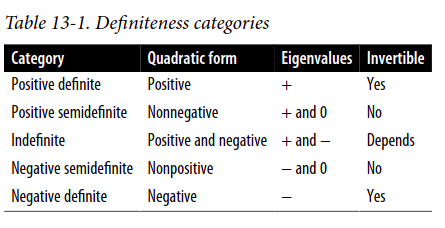<br>
“Depends” in the table means that the matrix can be invertible or singular dependingon the numbers in the matrix, not on the definiteness category.

### $A^TA$ Is Positive (Semi)definite
Any  matrix  that  can  be  expressed  as  the  product  of  a  matrix  and  its  transpose(that  is,  $S=A^TA$)  is  guaranteed  to  be  positive  definite  or  positive  semidefinite.  The combination of these two categories is often written as “positive (semi)definite.”<br>
All  data  covariance  matrices  are  positive  (semi)definite,  because  they  are  defined  as the  data  matrix  times  its  transpose.  This  means  that  all  covariance  matrices  have nonnegative eigenvalues. The eigenvalues will be all positive when the data matrix is full-rank (full column-rank if the data is stored as observations by features), and there will be at least one zero-valued eigenvalue if the data matrix is reduced-rank.<br>
The proof that S is positive (semi)definite comes from writing out its quadratic formand  applying  some  algebraic  manipulations.  (Observe  that  the  transition  from  the first to the second equation simply involves moving parentheses around; such “proof by parentheses” is common in linear algebra.)<br>
$$
w^TSw=w^T(A^TA)w
$$
$$
= (w^TA^T)(Aw)
$$
$$
= (Aw)^T(Aw)
$$
$$
= ||Aw||^2
$$<br>
The point is that the quadratic form of $A^TA$ equals the squared magnitude of a matrix times a vector. Magnitudes cannot be negative, and can be zero only when the vector is zero. And if Aw=0 for a non-trival w, then A is singular.<br>
Keep  in  mind  that  although  all  $A^TA$  matrices  are  symmetric,  not  all  symmetric matrices can be expressed as $A^TA$. In other words, matrix symmetry on its own does not guarantee positive (semi)definiteness, because not all symmetric matrices can be expressed as the product of a matrix and its transpose.

## Who Cares About the Quadratic Form and Definiteness?
Positive  definiteness  is  relevant  for  data  science  because  there  are  some  linear  algebra  operations  that  apply  only  to  such  well-endowed  matrices,  including  Cholesky decomposition,  used  to  create  correlated  datasets  in  Monte  Carlo  simulations.  Positive  definite  matrices  are  also  important  for  optimization  problems  (e.g.,  gradient descent), because there is a guaranteed minimum to find. In your never-ending quest to improve your data science prowess, you might encounter technical papers that use the abbreviation SPD: symmetric positive definite.

## Generalized Eigendecomposition
Consider  that  the  following  equation  is  the  same  as  the  fundamental  eigenvalue equation:
$$ Av = \lambda I v$$<br>
This  is  obvious  because  Iv=v.  Generalized  eigendecomposition  involves  replacing the identity matrix with another matrix (not the identity or zeros matrix):
$$ Av = \lambda B v$$<br>
Generalized  eigendecomposition  is  also  called  simultaneous  diagonalization  of  two matrices.  The  resulting  (λ,v)  pair  is  not  an  eigenvalue/vector  of  A  alone  nor  of  B alone. Instead, the two matrices share eigenvalue/vector pairs.<br>
Conceptually,  you  can  think  of  generalized  eigendecomposition  as  the  “regular” eigendecomposition of a product matrix:<br>
$$ C = AB^{-1}$$
$$ Cv = \lambda v$$
This is just conceptual; in practice, generalized eigendecomposition does not require B to be invertible.<br>
It  is  not  the  case  that  any  two  matrices  can  be  simultaneously  diagonalized.  But  this diagonalization is possible if B is positive (semi)definite.<br>
NumPy  does  not  compute  generalized  eigendecomposition,  but  SciPy  does.  If  you know  that  the  two  matrices  are  symmetric,  you  can  use  the  function  eigh,  which  is more numerically stable:

In [11]:
# create correlated matrices
A = np.random.randn(4,4)
A = A@A.T
B = np.random.randn(4,4)
B = B@B.T + A/10
# GED
from scipy.linalg import eigh
evals,evecs = eigh(A,B)
print(evals)
print(evecs)

[1.83705510e-03 8.83642784e-01 9.11462437e-01 8.59777232e+00]
[[ 0.40849744  0.508869    0.2854248  -0.57312013]
 [-0.49507767  0.01329211 -0.06726666  0.72640932]
 [-0.0097527  -0.35076501  0.46613832  1.03436849]
 [ 0.02638353 -0.21167293  0.06694747 -2.0141978 ]]


Be  mindful  of  the  order  of  inputs:  the  second  input  is  the  one  that  is  conceptually inverted.In  data  science,  generalized  eigendecomposition  is  used  in  classification  analysis.  In particular,  Fisher’s  linear  discriminant  analysis  is  based  on  the  generalized  eigendecomposition of two data covariance matrices.

## The Myriad Subtleties of Eigendecomposition
There  is  a  lot  more  that  could  be  said  about  the  properties  of  eigendecomposition.A  few  examples:  the  sum  of  the  eigenvalues  equals  the  trace  of  the  matrix,  while  the product  of  the  eigenvalues  equals  the  determinant;  not  all  square  matrices  can  be diagonalized;  some  matrices  have  repeated  eigenvalues,  which  has  implications  for their  eigenvectors;  complex  eigenvalues  of  real-valued  matrices  are  inside  a  circle  in the  complex  plane.  The  mathematical  knowledge  of  eigenvalues  runs  deep,  but  this chapter provides the essential foundational knowledge for working with eigendecom‐position in applications.

# Code Exercises

### Question 13-1.Interestingly, the eigenvectors of $A^{−1}$ are the same as the eigenvectors of A while the eigenvalues are $λ^{−1}$. Prove that this is the case by writing out the eigendecomposition of A and $A^{−1}$. Then illustrate it using a random full-rank 5 × 5 symmetric matrix.

In [12]:
# create the matrix
A = np.random.randn(5,5)
A = A.T@A

# compute its inverse
Ai = np.linalg.inv(A)

# eigenvalues of A and Ai
eigvals_A  = np.linalg.eig(A)[0]
eigvals_Ai = np.linalg.eig(Ai)[0]

# compare them (hint: sorting helps!)
print('Eigenvalues of A:')
print(np.sort(eigvals_A))

print(' ')
print('Eigenvalues of inv(A):')
print(np.sort(eigvals_Ai))

print(' ')
print('Reciprocal of evals of inv(A):')
print(np.sort(1/eigvals_Ai))

Eigenvalues of A:
[5.08602334e-03 4.08655748e-01 2.03556636e+00 4.30349329e+00
 1.08901444e+01]
 
Eigenvalues of inv(A):
[9.18261468e-02 2.32369364e-01 4.91263768e-01 2.44704743e+00
 1.96617265e+02]
 
Reciprocal of evals of inv(A):
[5.08602334e-03 4.08655748e-01 2.03556636e+00 4.30349329e+00
 1.08901444e+01]


### Question 13-2. Re-create  the  left-side  panel  of  Figure  13-1,  but  using  the  rows  of  V  instead  of columns. Of course you know that this is a coding error, but the results are insightful:it fails the geometry test that the matrix times its eigenvector only stretches.
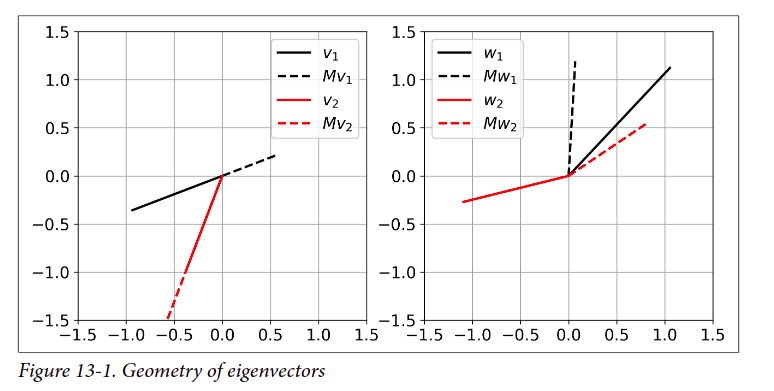

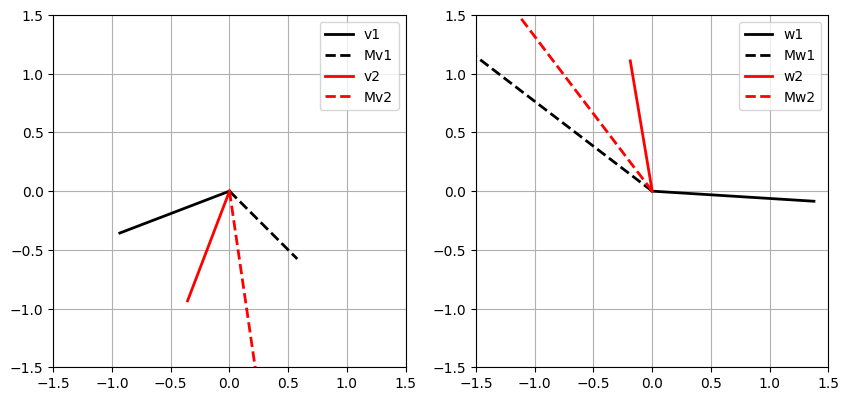

In [13]:
# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors



## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[0,1]],'k',linewidth=2,label='v1')
axs[0].plot([0,Mv[0,0]],[0,Mv[0,1]],'k--',linewidth=2,label='Mv1')

axs[0].plot([0,eigenvectors[1,0]],[0,eigenvectors[1,1]],'r',linewidth=2,label='v2')
axs[0].plot([0,Mv[1,0]],[0,Mv[1,1]],'r--',linewidth=2,label='Mv2')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[0,1]],'k',linewidth=2,label='w1')
axs[1].plot([0,Mw[0,0]],[0,Mw[0,1]],'k--',linewidth=2,label='Mw1')

axs[1].plot([0,notEigenvectors[1,0]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='w2')
axs[1].plot([0,Mw[1,0]],[0,Mw[1,1]],'r--',linewidth=2,label='Mw2')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()

### Question 13-3. The  goal  of  this  exercise  is  to  demonstrate  that  eigenvalues  are  in extricably  coupled to their eigenvectors. <br>Diagonalize a symmetric random-integers matrix created using the  additive  method  (see  Exercise  5-9),  but  randomly  reorder  the  eigenvalues  (let’s call this matrix Λ) without reordering the eigenvectors.<br>First,  demonstrate  that  you  can  reconstruct  the  original  matrix  as  $VΛV^{−1}$.  You  can compute reconstruction accuracy as the Frobenius distance between the original and reconstructed  matrix. <br> Next,  attempt  to  reconstruct  the  matrix  using  $\tilde{Λ}$.  How  close  is the  reconstructed  matrix  to  the  original?  What  happens  if  you  only  swap  the  two largest eigenvalues instead of randomly reordering them? How about the two smallest eigenvalues?<br> Finally,  create  a  bar  plot  showing  the  Frobenius  distances  to  the  original  matrix  forthe  different  swapping  options  (Figure  13-3).  (Of  course,  because  of  the  random matrices—and thus, random eigenvalues—your plot won’t look exactly like mine.)
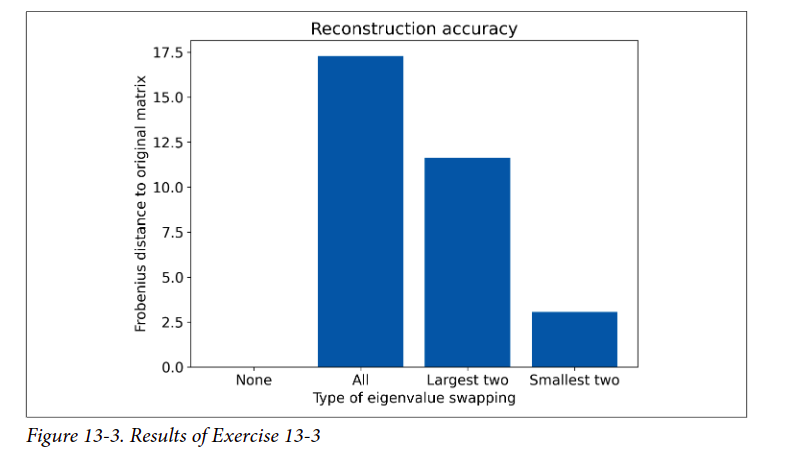

[[ 0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0.  0. -0.  0.]
 [-0. -0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.]]

Frobenius distance: 3.045880807592863e-15
[[ 0.1971  3.0316  1.0853  0.5572  0.0217]
 [ 3.0316 -1.156  -3.075  -1.2589 -1.1036]
 [ 1.0853 -3.075  -1.8868 -1.6282 -0.846 ]
 [ 0.5572 -1.2589 -1.6282  2.1112 -0.1552]
 [ 0.0217 -1.1036 -0.846  -0.1552  0.7346]]

Frobenius distance: 7.911311745938249
[[-0.1993  0.9773  1.5997  0.5322  0.6251]
 [ 0.9773 -1.7525 -2.2275 -0.8477 -0.1174]
 [ 1.5997 -2.2275 -0.8983 -0.3463 -1.3676]
 [ 0.5322 -0.8477 -0.3463 -0.113  -0.7302]
 [ 0.6251 -0.1174 -1.3676 -0.7302  2.9631]]

Frobenius distance: 6.125487619730882
[[ 0.2721  2.273   1.7269  0.805   0.4245]
 [ 2.273  -1.645  -3.122  -1.1585 -0.9997]
 [ 1.7269 -3.122  -1.4836 -1.566  -0.6981]
 [ 0.805  -1.1585 -1.566   2.0974 -0.1588]
 [ 0.4245 -0.9997 -0.6981 -0.1588  0.7591]]

Frobenius distance: 7.616856019981554


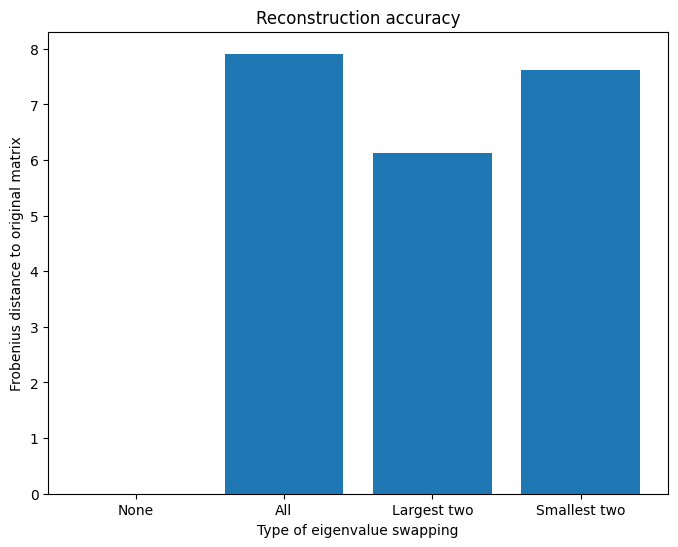

In [14]:
# instructions don't specify matrix size; I'll use n=5
N = 5

# to store the reconstruction accuracies
reconAcc = np.zeros(4)


# Create a symmetric random-integers matrix
A = np.random.randn(N,N)
A = np.round( A.T+A )

# diagonalize the matrix
d,V  = np.linalg.eig(A)
D    = np.diag(d)

# demonstrate reconstruction accuracy
# remember that inv(V)=V.T!
Arecon = V @ D @ V.T
print(np.round( A-Arecon ,4))

reconAcc[0] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[0]}')
# create D-tilde
Dtild = np.diag( d[np.random.permutation(N)] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[1] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[1]}')
### swap only the two largest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[np.arange(N-2),N-1,N-2]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[2] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[2]}')
### swap only the two smallest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[1,0,np.arange(2,N)]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[3] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[3]}')
# now for the plot

plt.figure(figsize=(8,6))

plt.bar(range(4),reconAcc)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')


plt.show()

### Question 13-4. One interesting property of random matrices is that their complex-valued eigenvalues are  distributed  in  a  circle  with  a  radius  proportional  to  the  size  of  the  matrix.  To demonstrate  this,  compute  123  random  42 × 42  matrices,  extract  their  eigenvalues, divide  by  the  square  root  of  the  matrix  size  (42),  and  plot  the  eigenvalues  on  the complex plane, as in Figure 13-4.
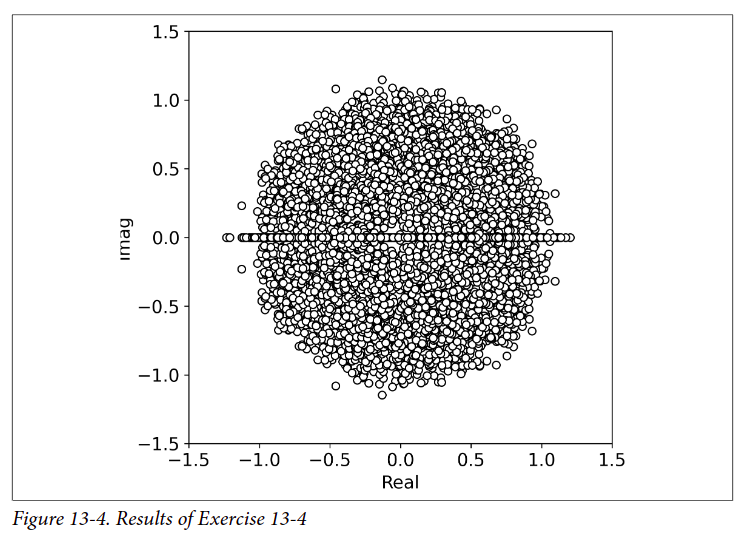

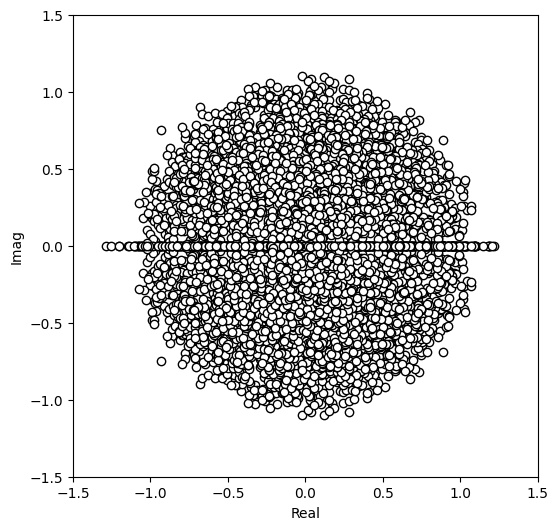

In [15]:
nIter = 123
matsize = 42
evals = np.zeros((nIter,matsize),dtype=complex)

# create the matrices and get their scaled eigenvalues
for i in range(nIter):
  A = np.random.randn(matsize,matsize)
  evals[i,:] = np.linalg.eig(A)[0] / np.sqrt(matsize)



# and show in a plot
plt.figure(figsize=(6,6))

plt.plot(np.real(evals),np.imag(evals),'ko',markerfacecolor='white')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

### Question 13-5. This  exercise  will  help  you  better  understand  that  an  eigenvector  is  the  basis  for the  null  space  of  the  eigenvalue-shifted  matrix—and  it  will  also  reveal  the  risks  of numerical precision errors. Eigendecompose a random 3 × 3 symmetric matrix. Then for  each  eigenvalue,  use  scipy.linalg.null_space()  to  find  a  basis  vector  for  the null  space  of  each  shifted  matrix.  Are  those  vectors  the  same  as  the  eigenvectors? Note that you might need to take into consideration the norms and the sign indeterminacies of eigenvectors.<br>When you run the code multiple times for different random matrices, you are likely to  get  Python  errors.  The  error  comes  from  an  empty  null  space  for  the  λ-shifted matrix,  which,  upon  investigation,  comes  from  the  shifted  matrix  being  full  rank.(Don’t  take  my  word  for  it;  confirm  this  yourself !)  That  is  not  supposed  to  happen, which  highlights—yet  again—that  (1)  finite-precision  math  on  computers  does  not always  conform  to  chalkboard  math  and  (2)  you  should  use  the  targeted  and  more numerically stable functions instead of trying to make direct translations of formulasinto code.

In [17]:
# get the null_space function from scipy
from scipy.linalg import null_space


# Create a symmetric matrix
N = 3
A = np.random.randn(N,N)
A = A@A.T

# eigendecompose
evals,evecs = np.linalg.eig(A)

# compare the eigenvectors with N(A-lI)
for i in range(N):

  # get the null space vector of the shifted matrix
  nullV = null_space( A-evals[i]*np.eye(N) )

  # check for a match with the eigenvector via correlation (normalizes for magnitudes)
  r = np.corrcoef(nullV.T,evecs[[i],:])[0,1]

  # and print (abs(r))
  print(f'Correlation between N(A-lI) and evec {i}: {np.abs(r):.2f}')

Correlation between N(A-lI) and evec 0: 0.97
Correlation between N(A-lI) and evec 1: 0.92
Correlation between N(A-lI) and evec 2: 0.88


### Question 13-6. I’m  going  to  teach  you  a  third  method  to  create  random  symmetric  matrices. Startby creating a 4 × 4 diagonal matrix with positive numbers on the diagonals (they can be,  for  example,  the  numbers  1,  2,  3,  4).  Then  create  a  4 × 4 Q  matrix  from  the  QRdecomposition  of  a  random-numbers  matrix.  Use  these  matrices  as  the  eigenvaluesand  eigenvectors,  and  multiply  them  appropriately  to  assemble  a  matrix.  Confirm that the assembled matrix is symmetric, and that its eigenvalues equal the eigenvalues you specified.

In [18]:
# Create the Lambda matrix with positive values
Lambda = np.diag( np.random.rand(4)*5 )

# create Q
Q,_ = np.linalg.qr( np.random.randn(4,4) )

# reconstruct to a matrix
A = Q @ Lambda @ Q.T

# the matrix minus its transpose should be zeros (within precision error)
np.round( A-A.T ,5)
# check eigenvalues against Lambda (sorting is helpful!)
print(np.sort(np.diag(Lambda)))
print(np.sort(np.linalg.eig(A)[0]))

[0.53117483 3.56909143 4.07674727 4.96169505]
[0.53117483 3.56909143 4.07674727 4.96169505]


### Question 13-8. This and the following exercise are closely linked. We will create surrogate data witha  specified  correlation  matrix  (this  exercise),  and  then  remove  the  correlation  (next exercise). The formula to create data with a specified correlation structure is: $$ Y = VΛ^{1/2}X$$<br> where V and Λ are the eigenvectors and eigenvalues of a correlation matrix, and X is an N×T matrix of uncorrelated random numbers (N channels and T time points).Apply that formula to create a 3 × 10,000 data matrix Y with the following correlation structure:<br> $$ R = \begin{bmatrix}1 & .2 & .9\\.2 & 1 & .3\\.9 & .3 & 1\end{bmatrix}$$<br>Then compute the empirical correlation matrix of the data matrix X. It won’t exactly equal  R  because  we  are  randomly  sampling  a  finite  dataset.  But  it  should  be  fairly close (e.g., within .01).


In [19]:
# correlation matrix
R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

# eigendecomposition
d,V = np.linalg.eig(R)
D = np.diag(d)

# create new data with imposed correlation
X = V @ np.sqrt(D) @ np.random.randn(3,10000)

np.corrcoef(X)

array([[1.        , 0.19178201, 0.89868851],
       [0.19178201, 1.        , 0.30168599],
       [0.89868851, 0.30168599, 1.        ]])

### Question 13-9. Now  let’s  remove  those  imposed  correlations  by  whitening.  Whitening  is  a  term  in signal and image processing to remove correlations. A multivariate time series can be whitened by implementing the following formula:$$\tilde{Y}=Y^TVΛ^{−1/2}$$Apply  that  formula  to  the  data  matrix  from  the  previous  exercise,  and  confirm  that the correlation matrix is the identity matrix (again, within some tolerance for random sampling).

In [20]:
# now whiten
Y = X.T @ V @ np.linalg.inv(np.sqrt(D))

# and check the correlations
np.round( np.corrcoef(Y.T) ,3)

array([[ 1.   , -0.   , -0.   ],
       [-0.   ,  1.   , -0.023],
       [-0.   , -0.023,  1.   ]])

### Question 13-10. In  generalized  eigendecomposition,  the  eigenvectors  are  not  orthogonal,  even  when both  matrices  are  symmetric.  Confirm  in  Python  that  $V^{−1}≠V^T$.  This  happens because although both A and B are symmetric, C=AB is not symmetric. However,  the  eigenvectors  are  orthogonal  with  respect  to  B,  which  means  that $V^TBV=I$.  Confirm  these  properties  by  performing  a  generalized  eigendecomposition on two symmetric matrices, and producing Figure 13-5.
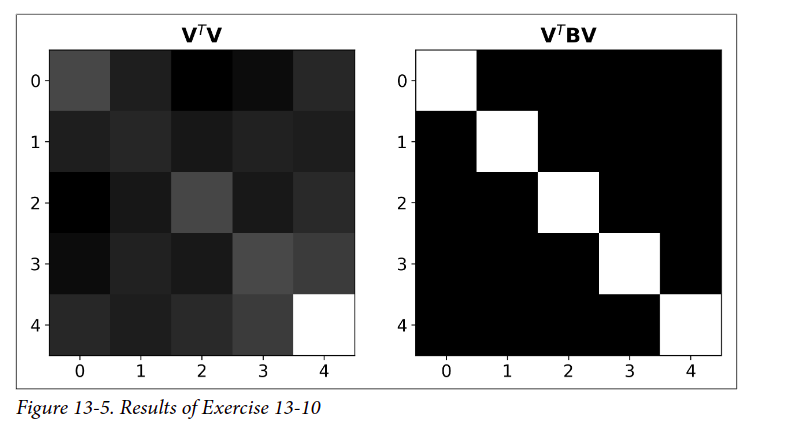

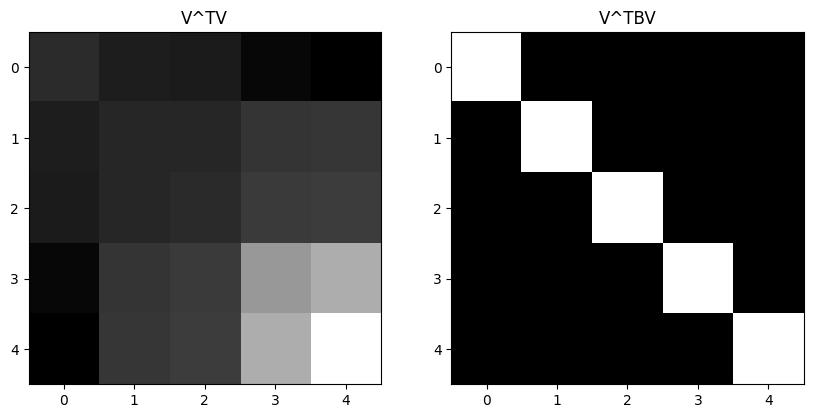

In [21]:
# two symmetric matrices and GED
n = 5
A = np.random.randn(n,n)
A = A.T@A
B = np.random.randn(n,n)
B = B.T@B

evals,evecs = eigh( A,B )

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs


# show in an image
_,axs = plt.subplots(1,2,figsize=(10,6))

axs[0].imshow(VV,cmap='gray')
axs[0].set_title('V^TV')

axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('V^TBV')

plt.show()

### Question 13-11. Let’s  explore  the  scaling  of  eigenvectors.  Start  by  creating  a  4 × 4  matrix  of  random integers drawn between −14 and +14. Diagonalize the matrix and empirically confirm that $A=VΛV^{−1}$. Confirm that the Euclidean norm of each eigenvector equals 1. Note that  the  square  of  a  complex  number  is  computed  as  that  number  times  its  complex conjugate (hint: use np.conj()).<br>Next, multiply the eigenvectors matrix by any nonzero scalar. I used π for no particularly good reason other than it was fun to type. Does this scalar affect the accuracy of the reconstructed matrix and/or the norms of the eigenvectors? Why or why not?<br>Finally,  repeat  this  but  use  a  symmetric  matrix,  and  replace  V−1  with  VT.  Does  this change the conclusion?

In [22]:
# create the matrix
A = np.random.randint(-14,15,(4,4))


# diagonalize
d,V = np.linalg.eig(A)
V   = V*np.pi
D   = np.diag(d)
Vi  = np.linalg.inv(V)


# test for accurate reconstruction
print('Reconstructed minus original:')
print( np.round(V@D@Vi - A,3) )
print(' ')

# norms of the eigenvectors
for i in range(A.shape[0]):
  norm = np.sqrt(np.sum(V[:,i]*np.conj(V[:,i])))
  print(f'Eigenvector {i} has norm {norm}')


# Discussion: Scaling V doesn't matter because that scalar is normalized out in the matrix inverse.

Reconstructed minus original:
[[ 0. -0. -0.  0.]
 [ 0.  0. -0.  0.]
 [ 0. -0. -0.  0.]
 [ 0.  0. -0.  0.]]
 
Eigenvector 0 has norm 3.141592653589793
Eigenvector 1 has norm 3.1415926535897936
Eigenvector 2 has norm 3.141592653589793
Eigenvector 3 has norm 3.1415926535897936


In [23]:
## repeat for a symmetric matrix using V' instead of inv(V)
# create the matrix
A = np.random.randint(-14,15,(4,4))
A = A.T@A


# diagonalize
d,V = np.linalg.eig(A)
V = V*np.pi
D = np.diag(d)
Vi = V.T


# test for accurate reconstruction
print('Reconstructed minus original:')
print( np.round(V@D@Vi - A,3) )
print(' ')

# norms of the eigenvectors
for i in range(A.shape[0]):
  norm = np.sqrt(np.sum(V[:,i]*np.conj(V[:,i])))
  print(f'Eigenvector {i} has norm {norm}')


# Discussion: Scaling V *does* matter because V is not explicitly inverted!

Reconstructed minus original:
[[ 2368.184  1933.574    17.739  -141.914]
 [ 1933.574  2616.533  -487.828 -1073.222]
 [   17.739  -487.828  1108.701    79.826]
 [ -141.914 -1073.222    79.826  1445.746]]
 
Eigenvector 0 has norm 3.1415926535897936
Eigenvector 1 has norm 3.1415926535897927
Eigenvector 2 has norm 3.1415926535897927
Eigenvector 3 has norm 3.1415926535897927
